# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# открываем файл из директории или по ссылке
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# посмотрим первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных:  
*airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)  
*balcony* — число балконов  
*ceiling_height* — высота потолков (м)  
*cityCenters_nearest* — расстояние до центра города (м)  
*days_exposition* — сколько дней было размещено объявление (от публикации до снятия)  
*first_day_exposition* — дата публикации  
*floor* — этаж  
*floors_total* — всего этажей в доме  
*is_apartment* — апартаменты (булев тип)  
*kitchen_area* — площадь кухни в квадратных метрах (м²)  
*last_price* — цена на момент снятия с публикации  
*living_area* — жилая площадь в квадратных метрах (м²)  
*locality_name* — название населённого пункта  
*open_plan* — свободная планировка (булев тип)  
*parks_around3000* — число парков в радиусе 3 км  
*parks_nearest* — расстояние до ближайшего парка (м)  
*ponds_around3000* — число водоёмов в радиусе 3 км  
*ponds_nearest* — расстояние до ближайшего водоёма (м)  
*rooms* — число комнат  
*studio* — квартира-студия (булев тип)  
*total_area* — общая площадь квартиры в квадратных метрах (м²)  
*total_images* — число фотографий квартиры в объявлении  

In [4]:
# посмотрим длину датасета
len(data)

23699

In [5]:
# посмотрим инфо

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# посмотрим min, max, среднее и тд.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*Вывод на основе описательных данных:*  
  
*last_price:* минимальная цена квартиры 12190 руб., что явно не характерно для рынка СПб и ЛО. Похоже на ошибку. Максимальная цена 763 000 000 руб. очень большая, но для исторических/элитных объектов возможна. НО! Такие значения могут плохо влиять на среднее значение, вероятно, большие данные тоже стоит исключить.  
  
*rooms:* минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверить.  
  
*ceiling_height:* минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка. Такие значения будем удалять.  
  
*floors_total:* max количество этажей 60 похоже на ошибку, самое высокое здание в Санкт-Петербурге и окретностях - Лахта имеет 35 этажей. Такие объекты следует удалить.  
  
*living_area:* min жилая площадь 2 м² невозможна, ошибка. Такие объекты следует удалить.  
  
*kitchen_area:* min площадь кухни 1,3 м² невозможна, ошибка. Такие объекты следует удалить.  
  
*airports_nearest:* min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка. Такие объекты следует удалить.  
  
*days_exposition:* минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.  

In [7]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

In [8]:
# посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

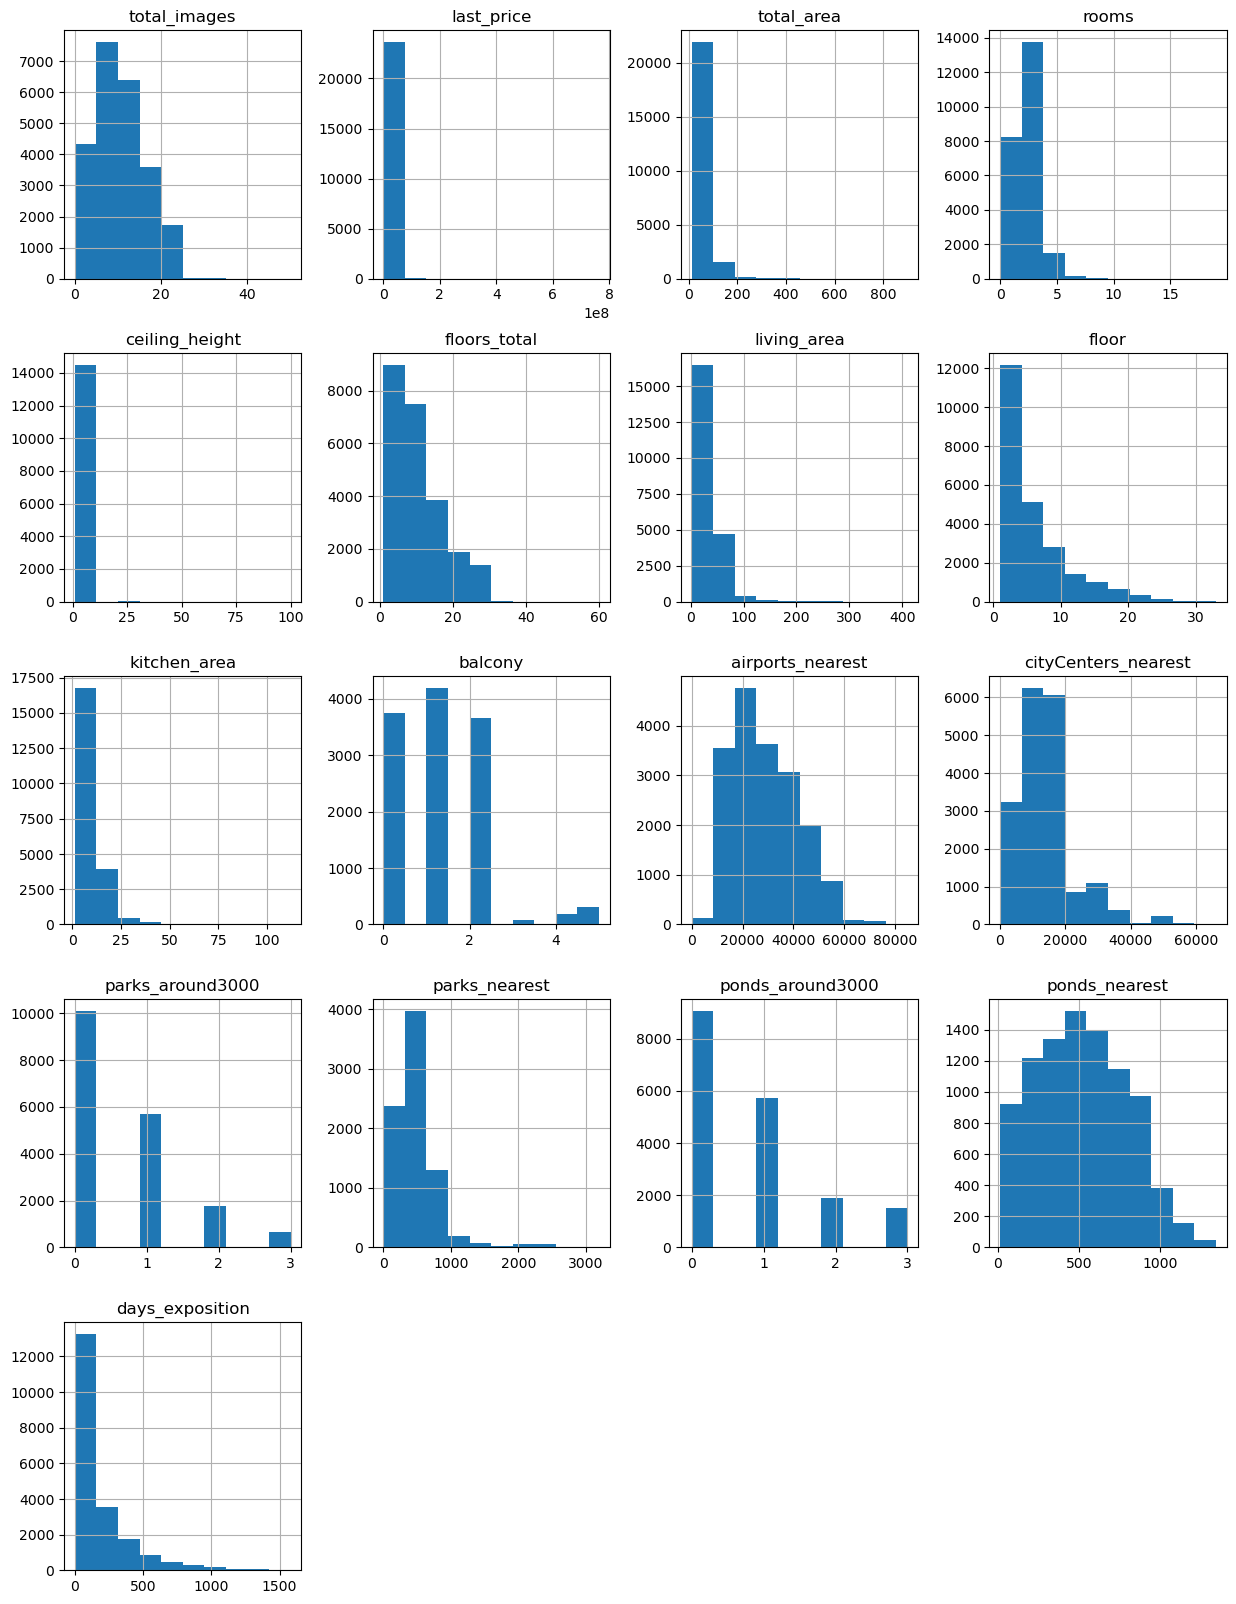

In [9]:
# построим гистораммы для датасета

data.hist(figsize=(15, 20))
plt.show()

**Вывод**  
  
1.Необходимо изменить тип данных в столбцах:  
  
  **last_price**: вещественное число float64 → int64  
  **first_day_exposition**: строка object → datetime  
  **floors_total**: вещественное число float64, по вводным данным целое число (этажей) → int64  
  **is_apartment**: строка object, по вводным данным булев тип → bool  
  **balcony**: вещественное число float64, по вводным данным целое число (балконов) → int64  
  **parks_around3000**: вещественное число float64, по вводным данным целое число (парков) → int64  
  **ponds_around3000**: вещественное число float64, по вводным данным целое число (водоемов) → int64  
  **days_exposition**: вещественное число float64, по вводным данным целое число (дней) → int64  
  
2.Большое количество пропусков в большинстве столбцов. Будем исправлять.  
  
3.На основе вывода по описательным данным, будем корректировать некоторые значения.  
  
4.Приведем названия столбцов к единому стилю.  

### Предобработка данных

Приведем имена столбцов к единому стилю.

In [10]:
# Переименовываем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Обработка пропусков.

In [11]:
# посмотрим еще раз количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах из 22 присутствуют пропуски:  
  
**ceiling_height**: 9195 пропусков. Почти 40% объявлений не имеют информацию о высоте потолков, это очень большое количество. Данные по этому столбцу для нашего исследования не так важны. Но, следует принять, что для более чем трети объектов он не указан. Пропуски заполняем медианным значением.  
  
**floors_total**: 86 пропусков. Пропусков мало, на исследование не повлияют. Пропуски оставляем.  
  
**living_area**: 1903 пропуска. Вероятно, пользователи не помнят точную площадь, поэтому не пишут ее. Кол-во пропусков менее 10%, но данные по этому столбцу нужны нам для исследования. Заполним пропуски по количеству комнат.  
  
**is_apartment**: 20924 пропусков. Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Т.к. в этом столбце булев тип данных, пропуски можно заменить на False.  
  
**kitchen_area**: 2278 пропусков. Вероятно, пользователи не указывают точный метраж кухни, т.к. не знают его.Кол-во пропусков менее 10%, но нам важны эти данные для исследования. Заполним значения с учётом того что общая площадь кухни составляет 10% от общей площади квартиры.  
  
**balcony**: 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.  
  
**locality_name**: 49 пропусков. Кол-во пропусков мало, на исследование не повлияют, оставим пропуски.  
  
**airports_nearest**: 5542 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Поэтому пропуски оставим.  
  
**city_centers_nearest**: 5519 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Пропуски в столбце на исследование не повлияют. Поэтому пропуски оставим.  
  
**parks_around_3000**: 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Возможно, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их.  
  
**parks_nearest**: 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их.  
  
**ponds_around_3000**: 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на исследование не влияют, оставим их.  
  
**ponds_nearest**: 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их.  
  
**days_exposition**: 3181 пропусков. 13% объявлений не содержат информации о количестве дней размещения объявления, подозрительно, т.к. эти данные должны быть получены автоматом. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.  
  
**Итог**: Обработаем пропуски в столбцах is_apartment (меняем на False) и balcony (меняем на 0).  

In [12]:
# заменяем пропуски на False
data['is_apartment'].fillna(False, inplace=True)
# проверка
data['is_apartment'].isna().sum()

0

In [13]:
# заменяем пропуски на 0
data['balcony'].fillna(0, inplace=True)
# проверка
data['balcony'].isna().sum()

0

Пропуски в столбцах is_apartment и balcony - отсутствуют.

In [14]:
# Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Обработаем жилую площадь квартир и площадь кухни

In [15]:
# Проверим пропуски
data['living_area'].isna().sum()

1903

In [16]:
# Попробуем заполнить пропуски медианым значением от общей площади квартиры
for t in data['living_area'].unique():
    median_value = data.loc[data['living_area'] == t, 'total_area'].median()
    data.loc[(data['total_area'].isna()) & (data['living_area'] == t), 'total_area'].median()

data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()

In [17]:
# Проверим
data['living_area'].isna().sum()

0

In [18]:
# Проверим
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

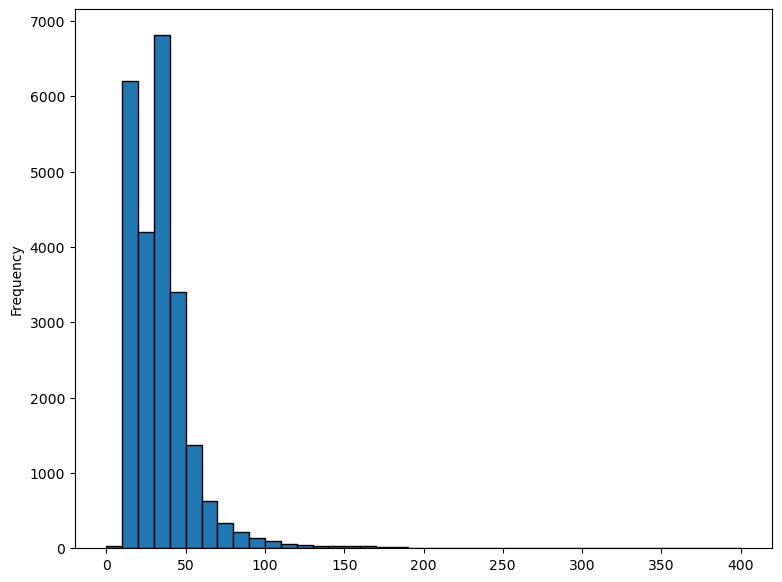

In [19]:
# Посмотрим график для наглядности
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 40, range=(0,400), figsize=(9,7), ec='black')
plt.show()

На графике видно что основная масса объявлений с общей жилой площадью составляет от 10 до 60 кв.м..

In [20]:
# Удалим значения менше 10 кв.м.
data = data.query('10 <= living_area', engine='python')

In [21]:
# Проверим пропуски
data['kitchen_area'].isna().sum()

2275

In [22]:
# заполняем пропуски в kitchen_area медианым значением от общей площади квартиры
for t in data['kitchen_area'].unique():
    median_value = data.loc[data['kitchen_area'] == t, 'total_area'].median()
    data.loc[(data['total_area'].isna()) & (data['kitchen_area'] == t), 'total_area'].median()

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()

In [23]:
# Проверим 
data['kitchen_area'].isna().sum()

0

In [24]:
# Проверим
data['kitchen_area'].describe()

count    23674.000000
mean        10.421485
std          5.623433
min          1.300000
25%          7.315000
50%          9.100000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64

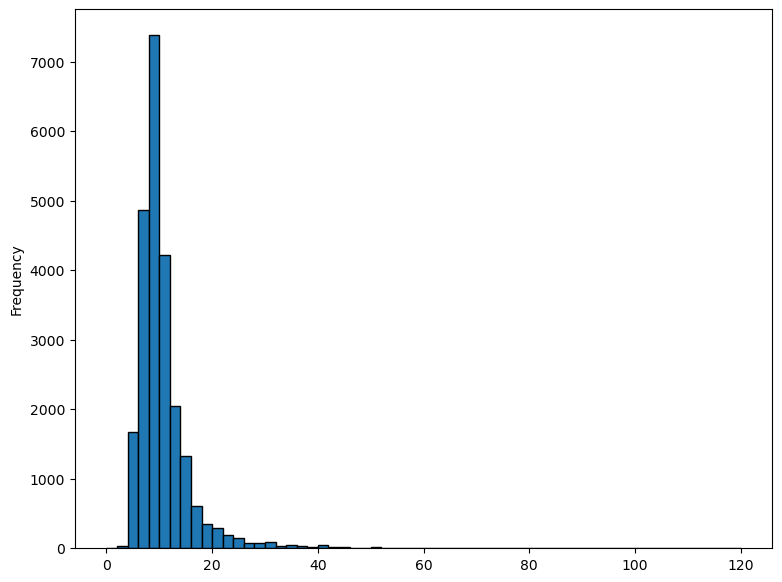

In [25]:
# Посмотрим график для наглядности
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 60, range=(0,120), figsize=(9,7), ec='black')
plt.show()

На графике видно, что основная масса объявлений содержит от 4 до 16 кв.м..

In [26]:
# Удалим значения менше 4 кв.м.
data = data.query('4 <= kitchen_area', engine='python')

Преобразуем типы данных

Изначально мы выделили столбцы, в которых нужно преобразовать один тип данных в другой. В ходе обработки пропусков получили, что некоторые пропуски убрать не удалось, преобразовать в другой тип(int64) также не получится. Для этих случаев оставим тип float64.

Меняем тип в следующих столбцах last_price(int64), first_day_exposition(datetime), is_apartment(boolean), balcony(int64)

In [27]:
# преобразуем столбцы 'last_price', 'balcony' к типу данных int
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
# проверяем
data[['last_price', 'balcony']].dtypes

last_price    int64
balcony       int64
dtype: object

In [28]:
# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [29]:
# преобразуем к булевому типу
data['is_apartment'] = data['is_apartment'].astype('boolean')
# проверка
data['is_apartment'].dtypes

BooleanDtype

In [30]:
# окончательно проверяем все столбцы
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Обработка дубликатов

Явные дубликаты

In [31]:
# проверим еще раз дубликаты и выведем их сумму
data.duplicated().sum()

0

Явных дубликатов не обнаружено

Неявные дубликаты

In [32]:
# выведем уникальные значения locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можно заметить что 'поселок' и 'посёлок' дублируют значения.

In [33]:
# заменяем поселок на посёлок через replace
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [34]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [35]:
# Через replace приведем к одному значению посёлок
data = data.replace({'locality_name':{'Никольское': 'село Никольское',
                                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора',
                                     'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
                                      'городской посёлок Мга': 'посёлок городского типа Мга',
                                     'городской посёлок Назия': 'посёлок городского типа Назия',
                                     'городской посёлок Павлово': 'посёлок городского типа Павлово',
                                     'городской посёлок Рощино': 'посёлок городского типа Рощино',
                                     'городской посёлок Советский': 'посёлок городского типа Советский',
                                     'посёлок при железнодорожной станции Вещево': 'посёлок станции Вещево',
                                     'посёлок при железнодорожной станции Приветнинское': 'посёлок станции Приветнинское'}})
                            

In [36]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'дере

In [37]:
# Удалим строки без города, они будут мешать в анализе и даже пользователям не понятно где вообще эти квартиры находятся.
data = data.dropna(subset=['locality_name'])

In [38]:
# проверим, что пропуски удалены.
data['locality_name'].isna().sum()

0

Далее посморим на столбец с высотой потолков ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров.  
**Явно ошибка**.

Можно заметить, что встречаются также потолки размером 20-30 метров. Что тоже аномалия. Логично предположить, что на самом деле это вещественные значения: 2-3 метра. Следовательно нужно поделить такие значения на 10

In [39]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [40]:
# Проверим
data['ceiling_height'].describe()

count    23596.000000
mean         2.698616
std          0.253313
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

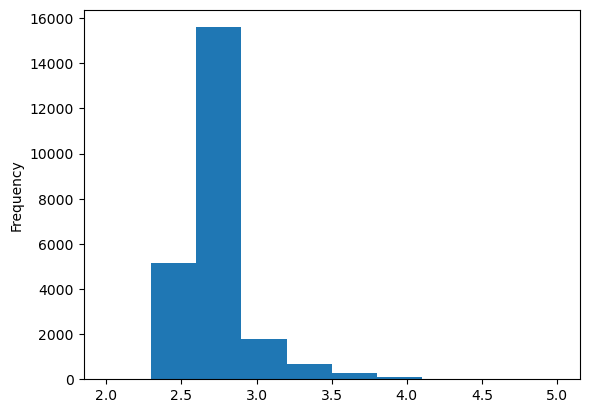

In [41]:
# Посмотрим график для наглядности
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

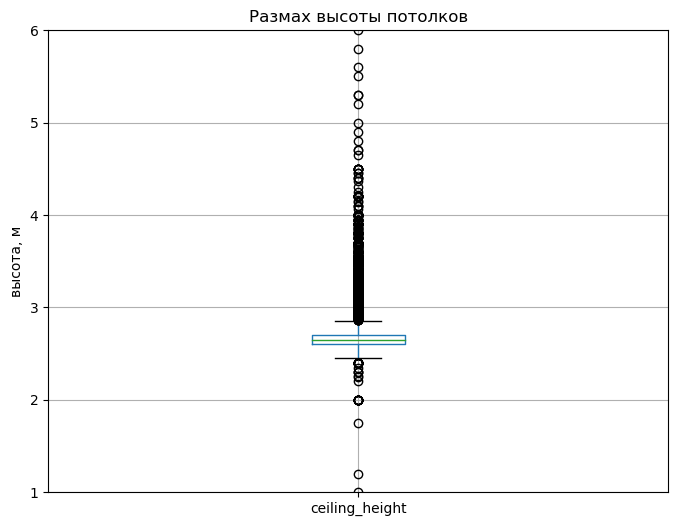

In [42]:
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Из графика видно, значения менее 2,5м и более 2,8 метров - выбросы.

In [43]:
# Оставим строки с высотой потолков от 2,5 до 5 метров
data = data.query('2.5 <= ceiling_height <= 5', engine='python')

Посмотрим на столбец floors_total. Удалим строки с кол-вом этажей больше 30

In [44]:
# Оставим строки с этажами < 30
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')

In [45]:
data['floors_total'].max()

29.0

Посмотрим данные по ценам на квартиры

In [46]:
# проверим пропуски
data['last_price'].isna().sum()

0

In [47]:
# Проверим
data['last_price'].describe()

count    2.347600e+04
mean     6.535276e+06
std      1.084436e+07
min      1.219000e+04
25%      3.423750e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

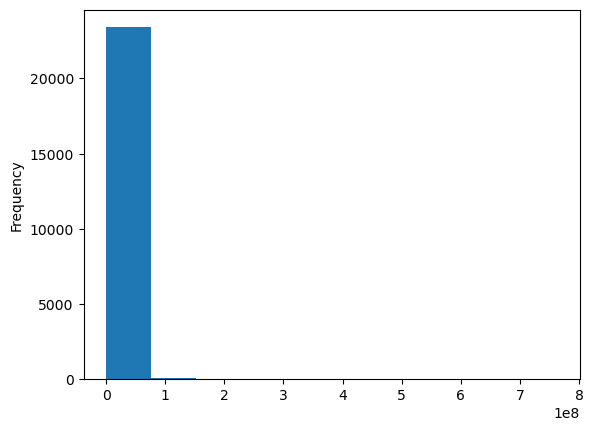

In [48]:
# Посмотрим график для наглядности
data['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 10, range=(12190,763000000))
plt.show()

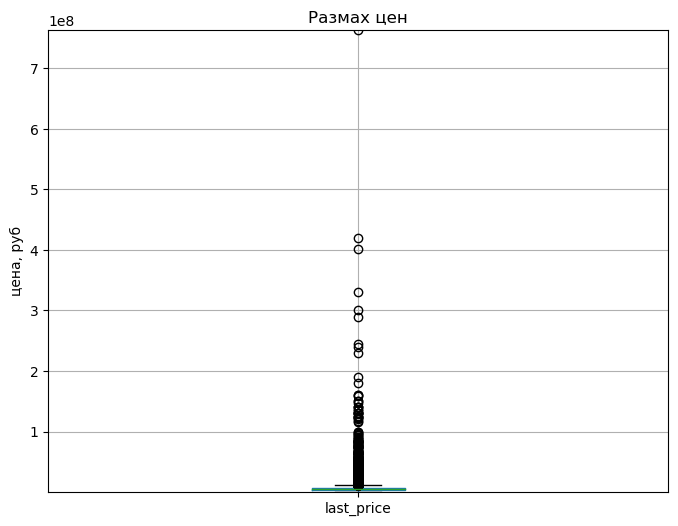

In [49]:
# Построим диаграмму размаха цен
data.boxplot(column='last_price', figsize=(8,6))
plt.title('Размах цен')
plt.ylim(12190,763000000)
plt.ylabel('цена, руб')
plt.show()

На графиках видно что цена выше 150 млн. рублей явные выбросы, но и цены менее 1-го млн. рублей тоже будем считать выбросами. 

In [50]:
# удалим все квартиры стоимостью менее 1-го млн. рублей и больше 150 млн. рублей
data = data.query('1000000 < last_price < 150000000', engine='python')

**Вывод**:  
сделали предобработку данных, а именно:  
Изменили типы данных,  
привели имена столбцов к единому стилю,  
обработали явные и неявные дубликаты,  
также обработали пропуски.  

### Посчитайте и добавьте в таблицу новые столбцы

Произведем расчет данных и добавим их в таблицу для дальнейшего исследования

**price_one_square_meter**: цена одного квадратного метра;  
**exposition_weekday**: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
**exposition_month**: месяц публикации объявления;  
**exposition_year**: год публикации объявления;  
**floor_category**: тип этажа квартиры (значения — «‎первый», «последний», «другой»);  
**city_centers_nearest_km**: расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Добавим столбец price_one_square_meter

In [51]:
# Добавим столбец с ценой за 1м²
data['price_one_square_meter'] = data['last_price'] / data['total_area']

# Округлим полученную цену до копеек
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)

In [52]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
16252,17,11000000,78.3,2017-12-10,4,2.65,5.0,52.6,5,False,...,1,Санкт-Петербург,21927.0,1813.0,0.0,NaN,2.0,54.0,90.0,140485.31
11136,7,3050000,44.1,2019-01-08,1,2.65,17.0,18.3,10,False,...,0,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,NaN,69161.00
9015,8,7000000,79.6,2016-03-31,2,2.80,16.0,34.0,10,False,...,5,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,82.0,87939.70
13786,0,3100000,45.0,2018-07-24,1,2.65,18.0,19.0,5,False,...,0,Санкт-Петербург,12697.0,11093.0,1.0,675.0,1.0,871.0,3.0,68888.89
2107,19,6399000,74.0,2018-10-15,4,2.60,9.0,49.0,6,False,...,0,Санкт-Петербург,35554.0,11585.0,0.0,NaN,1.0,818.0,88.0,86472.97


Добавим столбец exposition_weekday, exposition_month, exposition_year

In [53]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

In [54]:
# Проверяем
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017
23698,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,41795.67,4,7,2017


Добавим столбец с категоризацие по этажам floor_category

In [55]:
# Функция для категоризации этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [56]:
# Добавляем столбец с категорией этажа квартиры
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [57]:
# Проверим
data.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
14536,11,4658000,43.0,2017-04-20,1,2.65,18.0,18.0,15,False,...,0.0,NaN,1.0,896.0,123.0,108325.58,3,4,2017,другой
15517,11,8700000,62.3,2019-03-26,2,3.20,5.0,34.3,5,False,...,2.0,304.0,3.0,628.0,NaN,139646.87,1,3,2019,последний
8202,5,4700000,34.0,2018-10-25,1,2.80,18.0,16.0,6,False,...,NaN,NaN,NaN,NaN,13.0,138235.29,3,10,2018,другой
2777,10,13700000,96.0,2018-07-04,3,2.80,16.0,53.0,7,False,...,0.0,NaN,0.0,NaN,167.0,142708.33,2,7,2018,другой
22441,15,1260000,39.0,2015-04-04,1,2.75,9.0,20.0,3,False,...,NaN,NaN,NaN,NaN,503.0,32307.69,5,4,2015,другой
16803,7,1550000,33.5,2018-05-04,1,2.65,5.0,30.0,4,False,...,NaN,NaN,NaN,NaN,62.0,46268.66,4,5,2018,другой
4501,9,3900000,38.8,2017-08-31,1,2.65,17.0,20.0,13,False,...,0.0,NaN,0.0,NaN,36.0,100515.46,3,8,2017,другой


Добавим столбец city_centers_nearest_km

In [58]:
# переводим в км.
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [59]:
data.head(9)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN


**Вывод**:  
Добавили необходимые столбцы и произвели расчеты по ним. Отметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски. В столбце floor_category для 85 строк категория этажа могла определиться неверно (вместо последний -> другой), т.к. значения количества этажей для этих объектов отсутствуют. Учитывая то, что доля возможных ошибок крайне мала, на результаты исследования они не повлияют.

### Проведите исследовательский анализ данных

Изучение параметров объектов недвижимости

Общая площадь

In [60]:
# Посмторим описательную часть для этого столбца
data['total_area'].describe()

count    23216.000000
mean        60.359210
std         34.427469
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

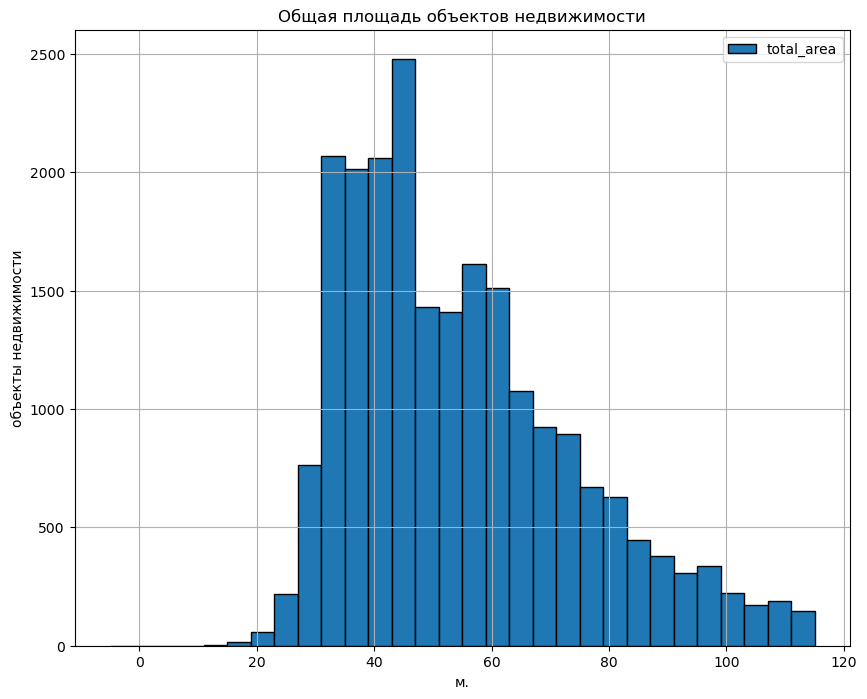

In [61]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 115 кв.м., исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 кв.м. до 65 кв.м.. Самый распространенный вариант - около 45 кв.м.. Площадь объектов более 100 кв.м. встречается редко. С площадью меньше 30 кв.м. также редкость. Среднее значение - 60 кв.м. и медиана 52 кв.м. сдвинуты в сторону больших значений. Их не так много, но график получается растянутым

Жилая площадь

In [62]:
# Посмторим описательную часть для этого столбца
data['living_area'].describe()

count    23216.000000
mean        34.118778
std         20.758438
min         10.000000
25%         19.100000
50%         30.000000
75%         41.300000
max        409.000000
Name: living_area, dtype: float64

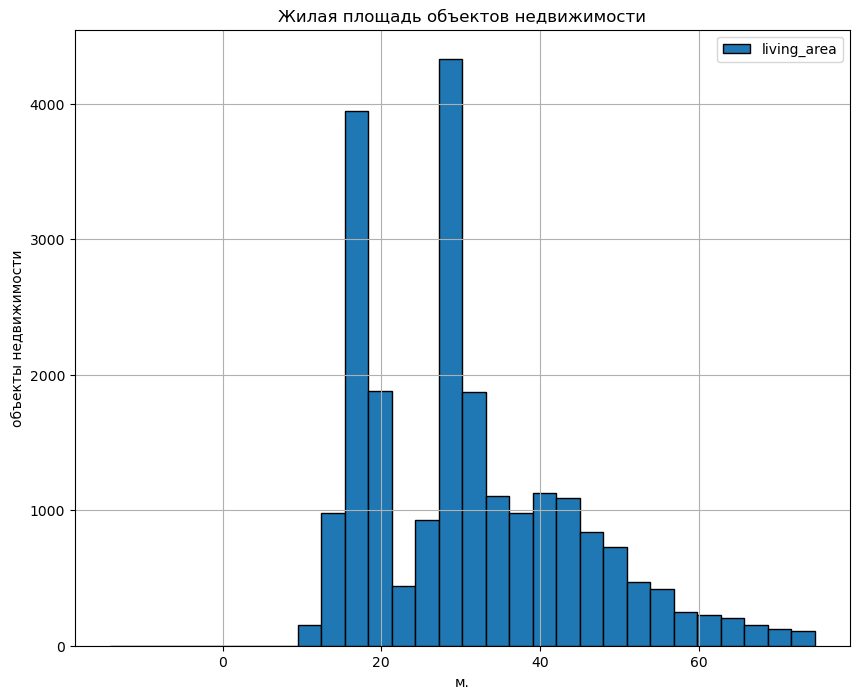

In [63]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 78 кв.м., исключая выбросы. Большая часть объектов недвижимости имеют жилую площадь от 15 кв.м. до 35 кв.м.. Самый распространенный вариант - около 15 кв.м.. Жилая площадь объектов более 60 кв.м. встречается редко. С площадью меньше 15 кв.м. также редкость. Среднее значение - 34 кв.м., медиана 30 кв.м.. У графика также наблюдается "хвост" из-за редких, но больших значений.

Площадь кухни

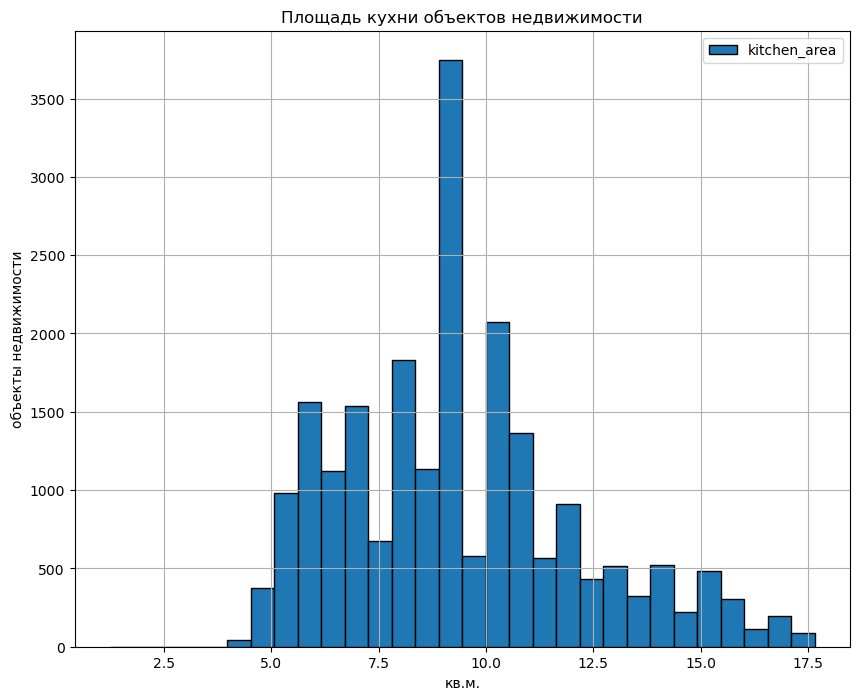

In [64]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('кв.м.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 19 кв.м., исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5,5 кв.м. до 12 кв.м.. Самый распространенный вариант - около 5,5 кв.м.. Площадь кухни более 13 кв.м. встречается редко. Площадь кухни менее 5 кв.м. также редкость. Среднее значение - 10,5 кв.м., медиана 9,1 кв.м.. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений

Цена объекта

In [65]:
# Посмторим описательную часть для этого столбца
data['last_price'].describe()

count    2.321600e+04
mean     6.412029e+06
std      7.325119e+06
min      1.010000e+06
25%      3.490000e+06
50%      4.672500e+06
75%      6.800000e+06
max      1.480000e+08
Name: last_price, dtype: float64

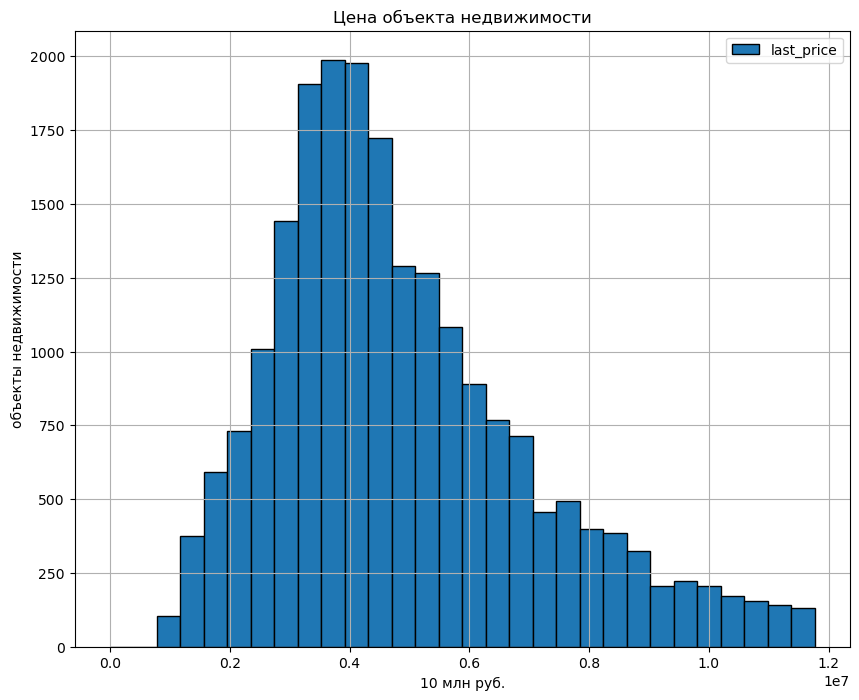

In [66]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 4 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений

Количество комнат

In [67]:
# Посмторим описательную часть для этого столбца
data['rooms'].describe()

count    23216.000000
mean         2.073656
std          1.076126
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

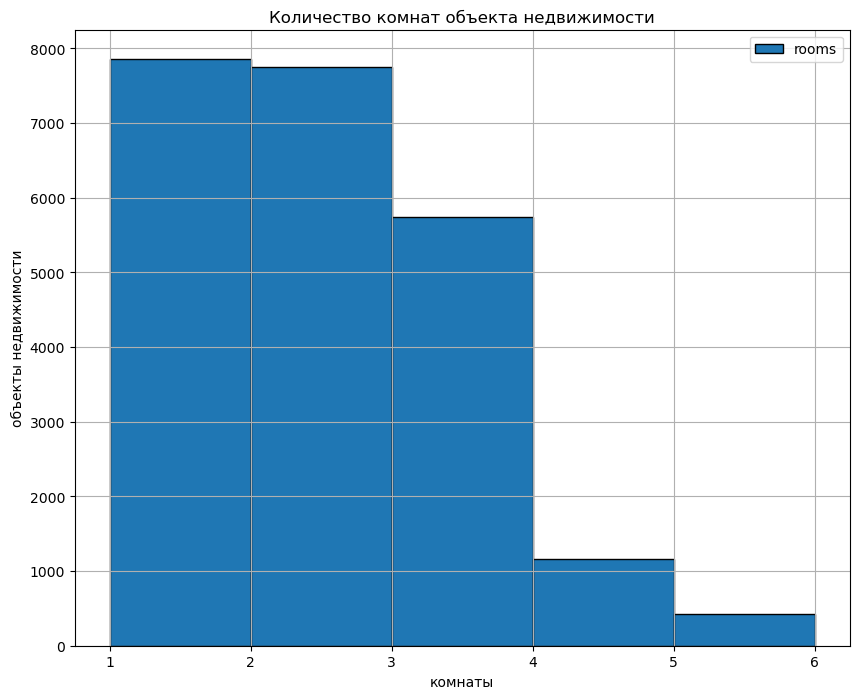

In [68]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение

Высота потолков

In [69]:
# Посмторим описательную часть для этого столбца
data['ceiling_height'].describe()

count    23216.000000
mean         2.697457
std          0.214865
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

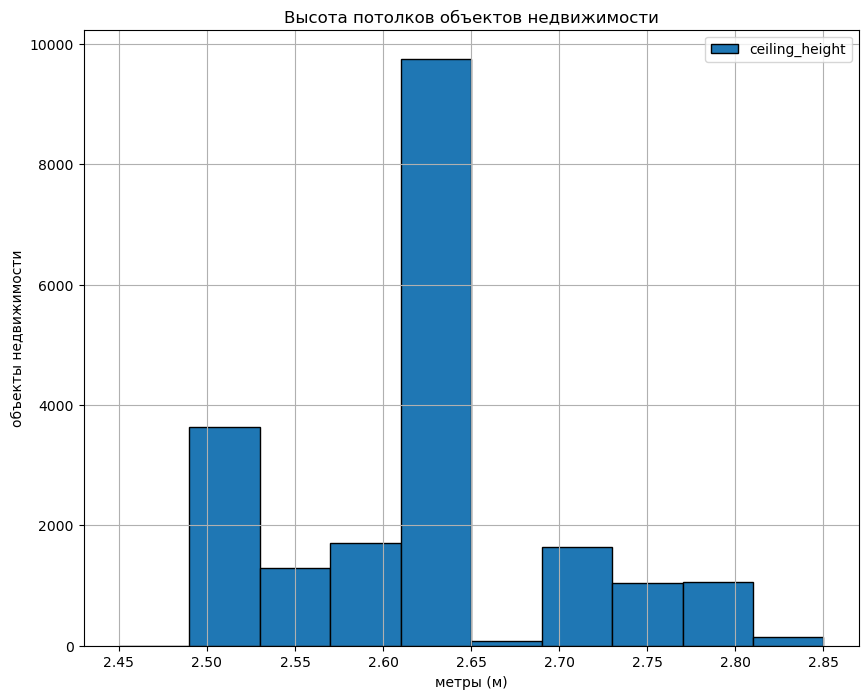

In [70]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.

Этаж квартиры

In [71]:
# Посмторим описательную часть для этого столбца
data['floor'].describe()

count    23216.000000
mean         5.910364
std          4.864516
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

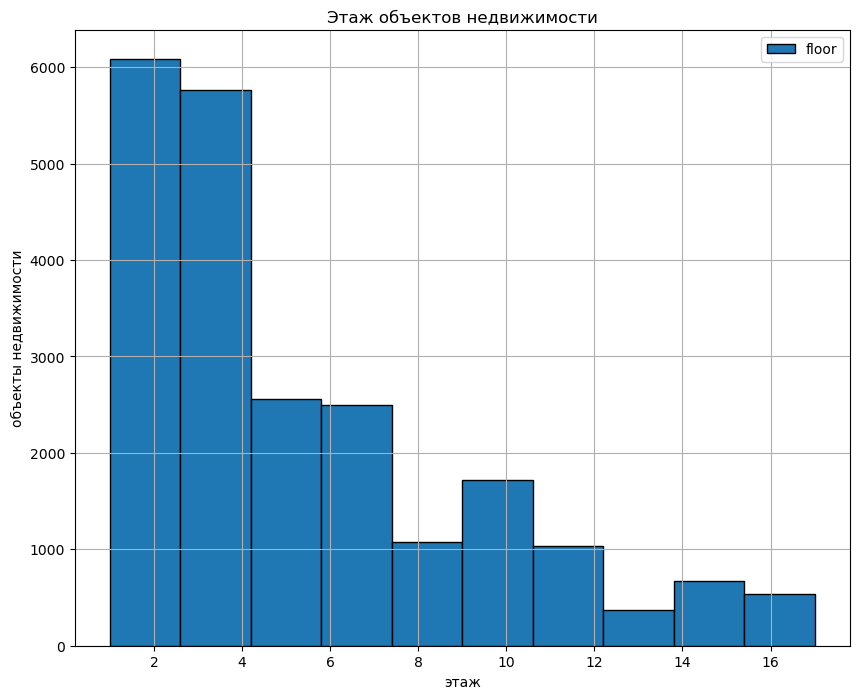

In [72]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.

Тип этажа квартиры («первый», «последний», «другой»)

In [73]:
#Вспомним как мы обозначили столбец с категоризацией по типу квартиры
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [74]:
# Вызовем describe
data['floor_category'].describe()

count      23216
unique         3
top       другой
freq       17190
Name: floor_category, dtype: object

In [75]:
# Посмотрим на кол-во в каждой категории
data['floor_category'].value_counts()

floor_category
другой       17190
последний     3217
первый        2809
Name: count, dtype: int64

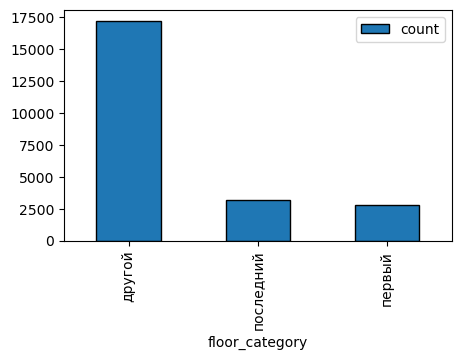

In [76]:
# Отобразим это на графике
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

Общее количество этажей в доме

In [77]:
# Выведем описательную статистику для столбца
data['floors_total'].describe()

count    23132.000000
mean        10.719609
std          6.524392
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

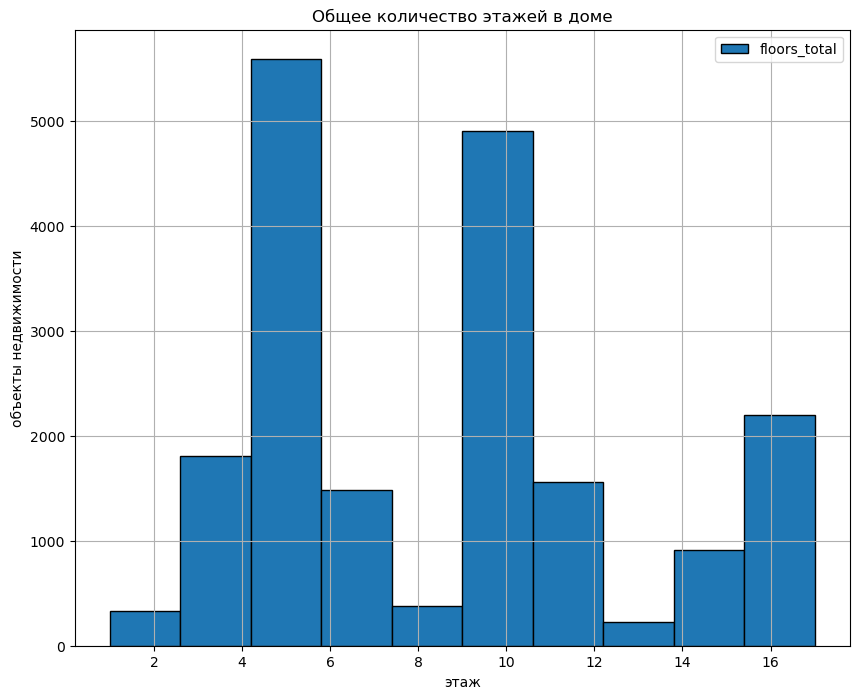

In [78]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму общего кол-ва этажей в доме
data['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

Расстояние до центра города в метрах

In [79]:
# Выведем описательную статистику для столбца
data['city_centers_nearest'].describe()

count    17986.000000
mean     14201.064995
std       8608.565420
min        181.000000
25%       9265.000000
50%      13105.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

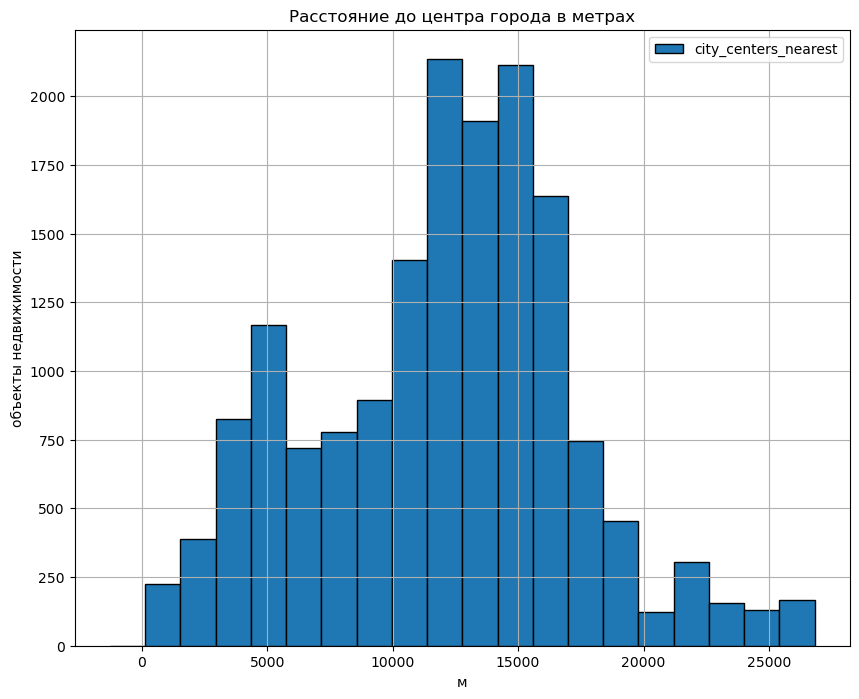

In [80]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 3000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км

Расстояние до ближайшего аэропорта

In [81]:
# Уберем значения равные 0 
data = data.query('airports_nearest != 0')

In [82]:
# Выведем описательную статистику для столбца
data['airports_nearest'].describe()

count    17962.000000
mean     28831.434417
std      12651.042608
min       6450.000000
25%      18551.000000
50%      26773.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

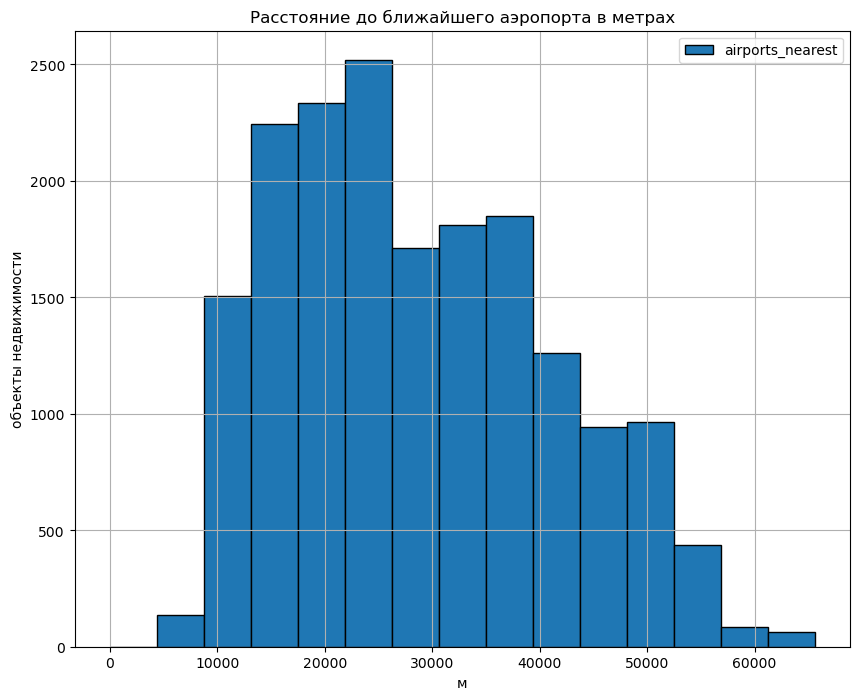

In [83]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['airports_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['airports_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['airports_nearest'].hist(bins=15, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км.

Расстояние до ближайшего парка в метрах

In [84]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [85]:
# Посмотрим описательную статистику
data['parks_nearest'].describe()

count    7993.000000
mean      490.850995
std       343.147234
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

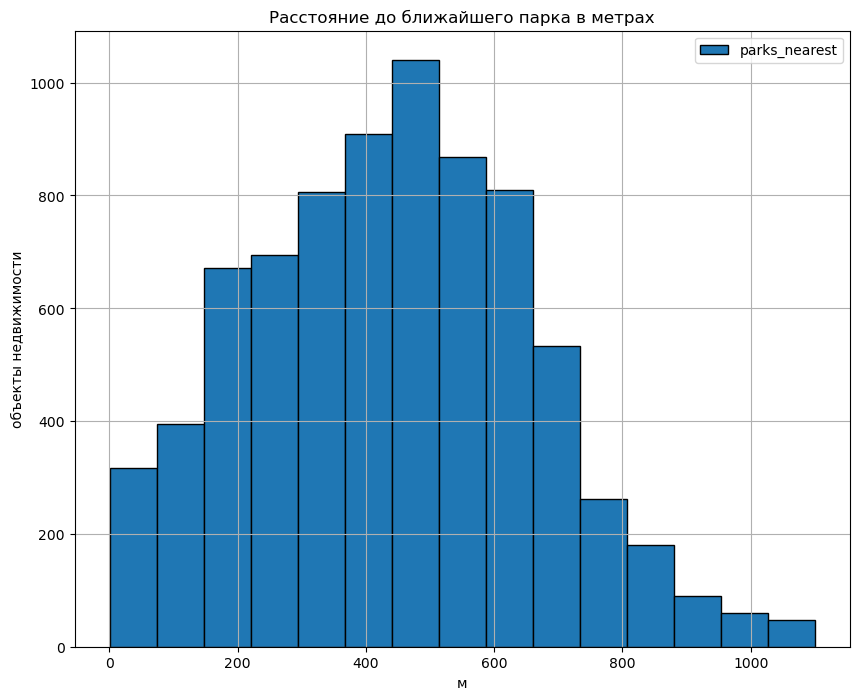

In [86]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м

**День и месяц публикации объявления**

День публикации объявления

In [87]:
# Посмотрим описательную статистику
data['exposition_weekday'].describe()

count    23215.000000
mean         2.566143
std          1.787835
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [88]:
# Посмотрим кол-во объявлений по каждому дню недели
data['exposition_weekday'].value_counts().sort_values()

exposition_weekday
6    1653
5    1890
0    3541
2    3887
4    3925
1    4113
3    4206
Name: count, dtype: int64

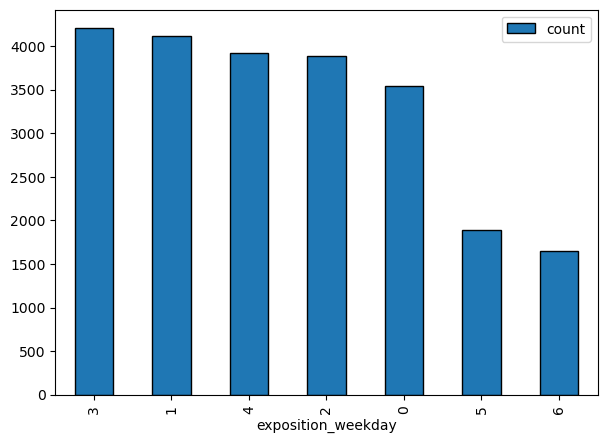

In [89]:
# Отобразим это на графике
data['exposition_weekday'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни.

Месяц публикации объявления

In [90]:
# Посмотрим описательную статистику
data['exposition_month'].describe()

count    23215.000000
mean         6.405729
std          3.491559
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [91]:
# Посмотрим кол-во объявлений по каждому дню недели
data['exposition_month'].value_counts().sort_values()

exposition_month
5     1246
1     1460
12    1612
7     1663
8     1709
6     1719
9     1940
10    2087
11    2329
4     2331
3     2537
2     2582
Name: count, dtype: int64

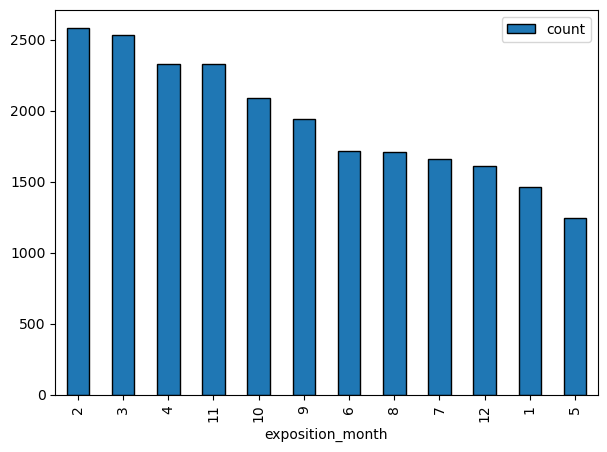

In [92]:
# Отобразим это на графике
data['exposition_month'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.

**Вывод**: Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 кв.м., площадью кухни около 5,5 кв.м., с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 500 метров.

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

Постройте гистограмму.  
Посчитайте среднее и медиану.  
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

Проанализируем время продажи квартиры.

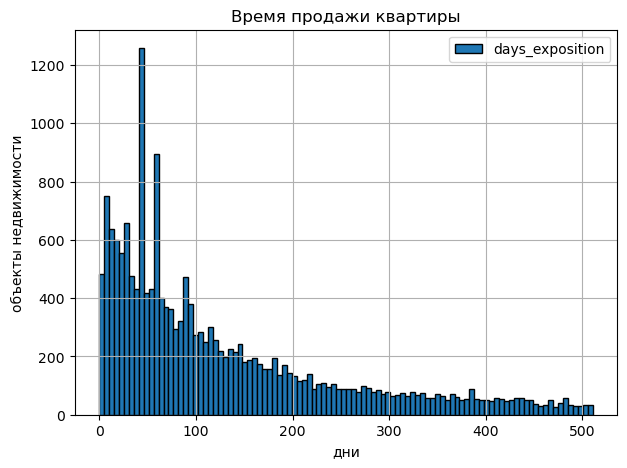

In [93]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Изменим масштаб - изменим период до 100 дней.

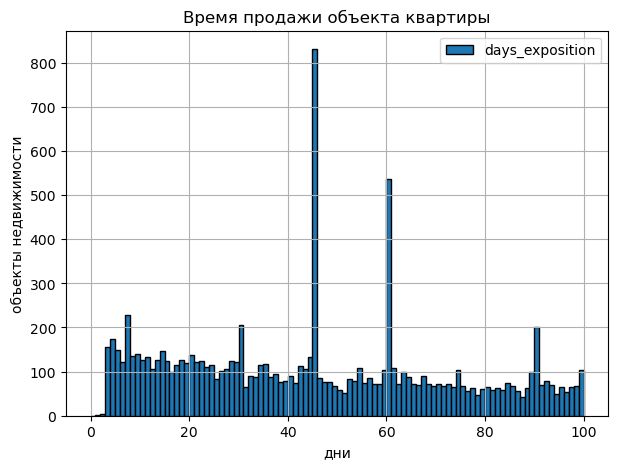

In [94]:
# Ограничим гистограмму периодом до 100 дней
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.

Теперь посмотрим на среднее и медиану.

In [95]:
# Получим описательную статистику столбца days_exposition
data['days_exposition'].describe()

count    20112.000000
mean       181.122414
std        220.500349
min          1.000000
25%         45.000000
50%         95.000000
75%        231.250000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней. Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Чтобы посмотреть на всю эту красоту нужно построить диаграмму размаха.

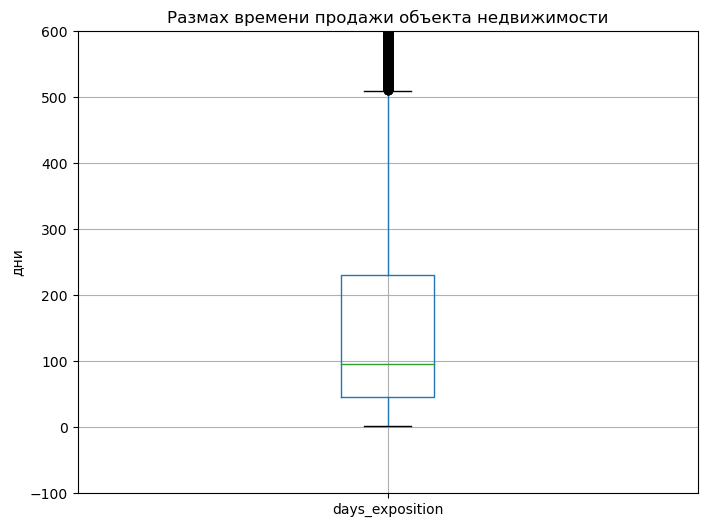

In [96]:
# Строим диаграмму размаха времени продажи объекта недвижимости
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [97]:
# Все, что выше этого значения - это выбросы
print(q3 + 1.5 * iqr)

510.625


In [98]:
len(data)

23215

Обновим датафрейм без выбросов

In [99]:
# Убираем выбросы
data_update = data.query('days_exposition < 510.625')

# Проверим длину датафрейма
len(data_update)

18459

In [100]:
23215 - 18459

4756

**Вывод**:
Убрали из датафрейма 4756 строк, которые содержали выбросы по времени продажи объекта. Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Изучите, зависит ли цена от:  
  
общей площади;  
жилой площади;  
площади кухни;  
количества комнат;  
этажа, на котором расположена квартира (первый, последний, другой);  
даты размещения (день недели, месяц, год).  
  
Постройте графики, которые покажут зависимость цены от указанных выше параметров.  

Воспользуемся библиотекой seaborn и графиком heatmap

In [101]:
# Выведем названия столбцов
data_update.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_one_square_meter',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'floor_category', 'city_centers_nearest_km'],
      dtype='object')

In [102]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

In [103]:
# Список с названиями параметров
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data_update[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.735790,0.440915,-0.269556,0.007352,0.001450,-0.043357
total_area,0.735790,1.000000,0.765603,-0.218038,0.003371,-0.000577,-0.070241
rooms,0.440915,0.765603,1.000000,-0.169261,0.000686,-0.002569,-0.063275
city_centers_nearest,-0.269556,-0.218038,-0.169261,1.000000,0.003752,-0.013286,0.016772
exposition_weekday,0.007352,0.003371,0.000686,0.003752,1.000000,0.014124,-0.002964
exposition_month,0.001450,-0.000577,-0.002569,-0.013286,0.014124,1.000000,-0.223076
exposition_year,-0.043357,-0.070241,-0.063275,0.016772,-0.002964,-0.223076,1.000000


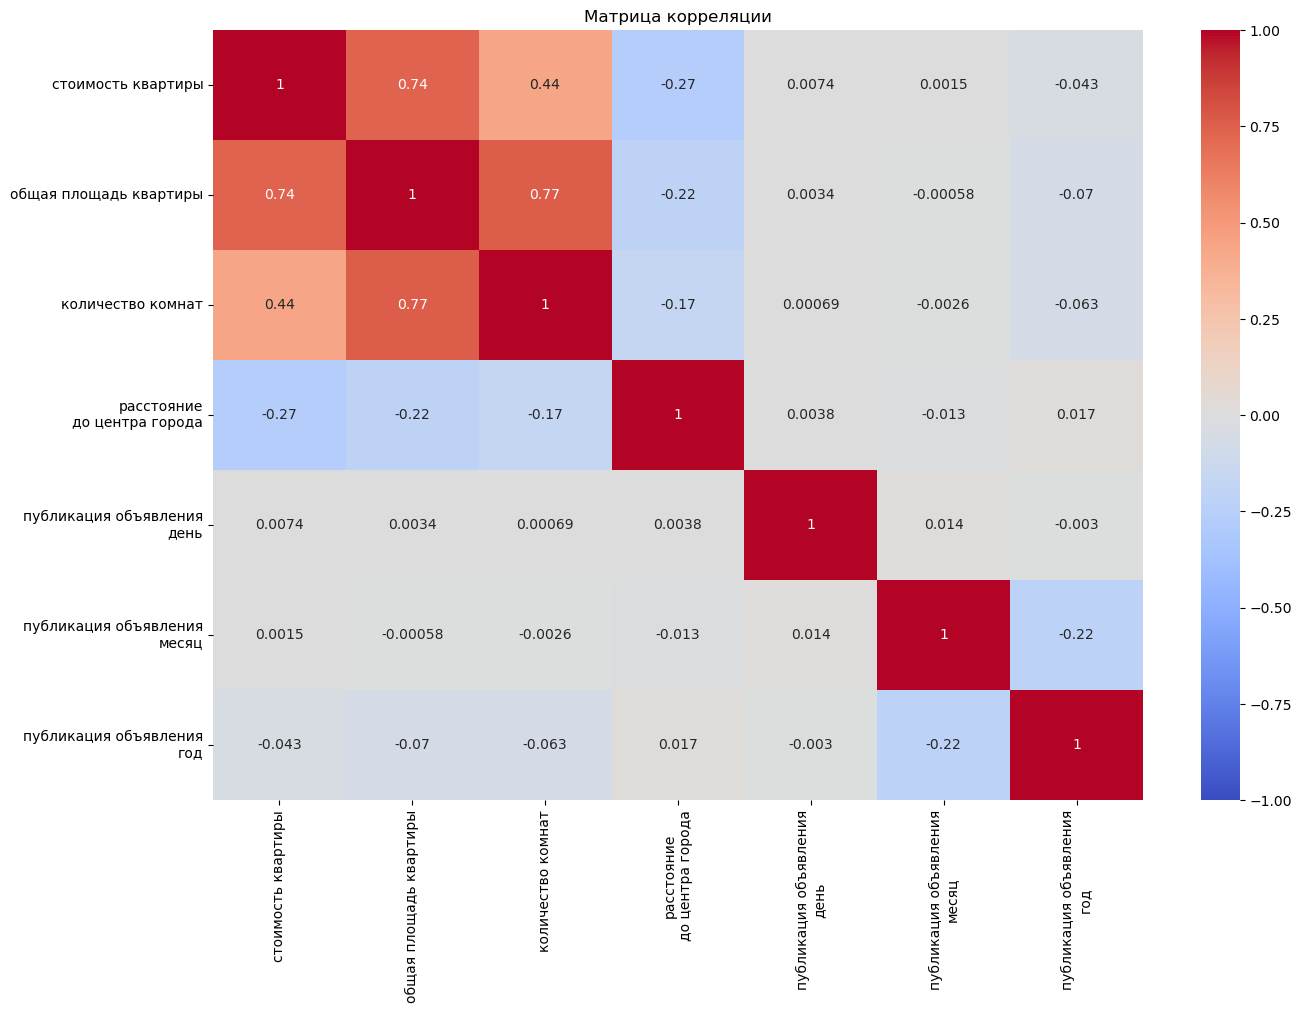

In [104]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

**Вывод**:

Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадью. Соответственно чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь.

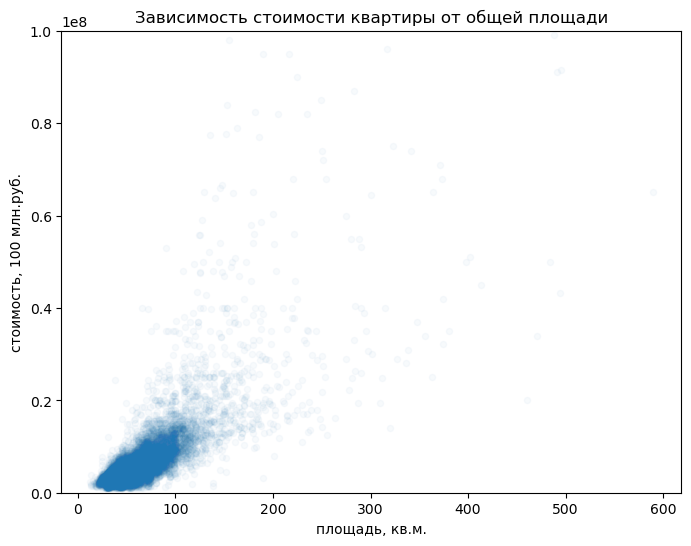

In [105]:
# используем тип графика scatter
data_update.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('площадь, кв.м.')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

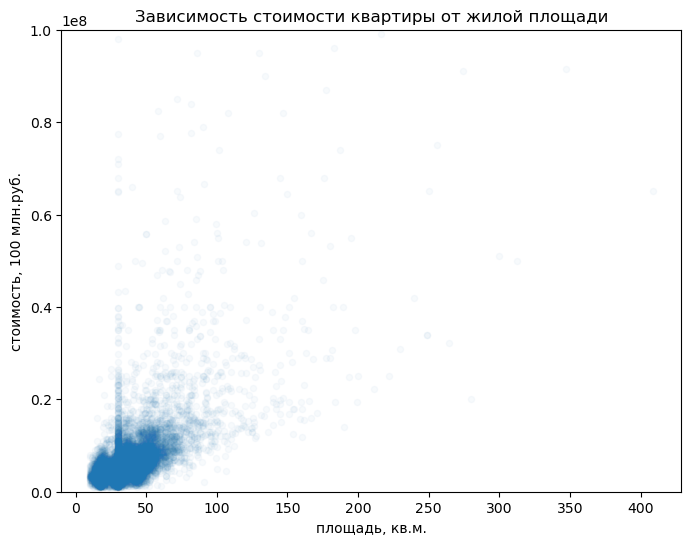

In [106]:
# используем тип графика scatter
data_update.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('площадь, кв.м.')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жило площадью до 75 кв.м.. Зависимость прямопропорциональная - чем больше жилаяплощадь квартиры, тем выше ее стоимость.

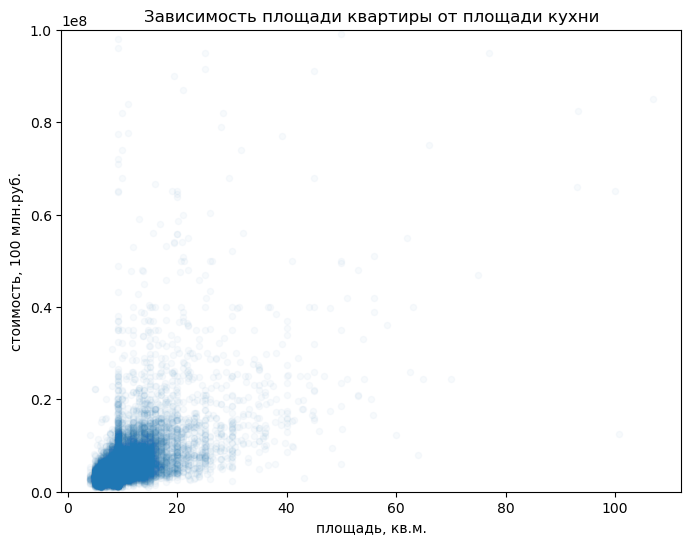

In [107]:
# используем тип графика scatter
data_update.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади квартиры от площади кухни')
plt.xlabel('площадь, кв.м.')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 кв.м.. Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость. Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 кв.м.. Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость

Посмотрим зависимомть цен квартир от колличества комнат

,mean,count,median
rooms,,,
0,3.267922e+06,169,2700000
1,3.807949e+06,6640,3590000
2,5.409765e+06,6267,4700000
3,7.708278e+06,4290,6000000
4,1.202724e+07,790,8500000
5,2.158575e+07,195,13000000
6,2.777115e+07,61,19500000
7,3.365250e+07,32,22950000
8,3.338167e+07,6,28745000


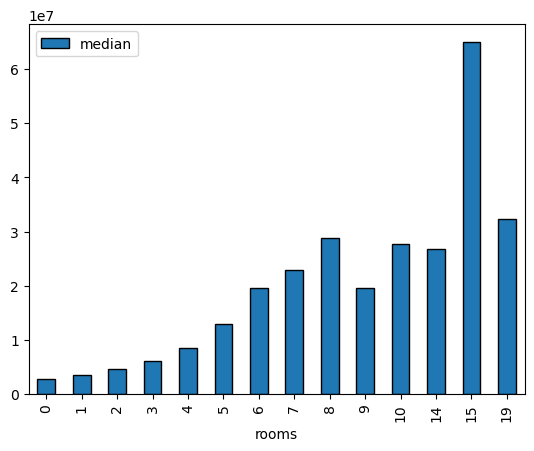

In [108]:
# Создаем сводную таблицу
pivot_table_rooms_category = data_update.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_rooms_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_rooms_category.plot.bar(y = 'median', ec='black', legend=True)
#Выводим
pivot_table_rooms_category

Из графика видно что чем больше комнат в квартире тем цена выше, даже с учётом очень редких объявлений с колличеством комнат больше 7.

Посмотрим зависимость от дня недели публикации.

,mean,count,median
exposition_weekday,,,
0,5.876469e+06,2743,4500000
1,5.903249e+06,3257,4500000
2,5.833882e+06,3039,4500000
3,6.121564e+06,3360,4500000
4,5.903963e+06,3219,4490000
5,6.084805e+06,1510,4500000
6,5.970578e+06,1331,4472000


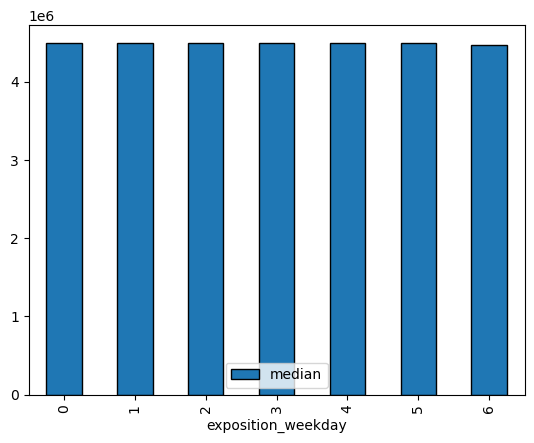

In [109]:
# Создаем сводную таблицу, график дня недели от стоимости
pivot_table_exposition_weekday_category = data_update.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_exposition_weekday_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_exposition_weekday_category.plot.bar(y = 'median', ec='black', legend=True)
#Выводим
pivot_table_exposition_weekday_category

Зависимость от дня недели публикации не просматривается.

Посмотрим зависимость от месяца публикации.

,mean,count,median
exposition_month,,,
1,5.745812e+06,1146,4500000
2,5.942900e+06,2085,4530000
3,5.794478e+06,1736,4495000
4,5.910090e+06,1358,4500000
5,6.158023e+06,998,4500000
6,6.070833e+06,1485,4350000
7,6.264432e+06,1436,4500000
8,5.892868e+06,1488,4500000
9,6.176078e+06,1685,4600000


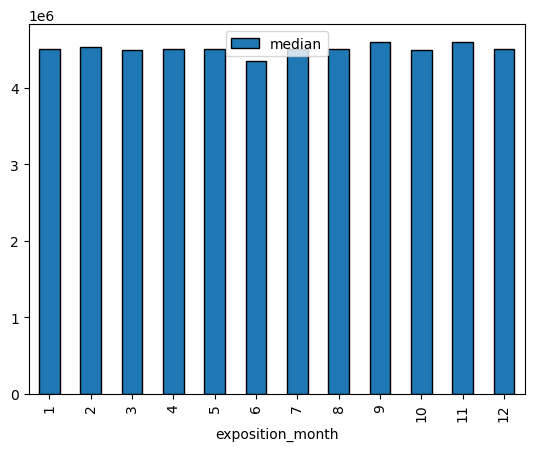

In [110]:
# Создаем сводную таблицу, график месяца от стоимости 
pivot_table_exposition_month_category = data_update.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_exposition_month_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_exposition_month_category.plot.bar(y = 'median', ec='black', legend=True)
#Выводим
pivot_table_exposition_month_category

Зависимость от месяца публикации не просматривается.

Посмотрим зависимость отгода публикации.

,mean,count,median
exposition_year,,,
2015,7.210344e+06,457,4890000
2016,6.344347e+06,2058,4500000
2017,6.083963e+06,7487,4499000
2018,5.625609e+06,7389,4500000
2019,5.911380e+06,1068,4799250


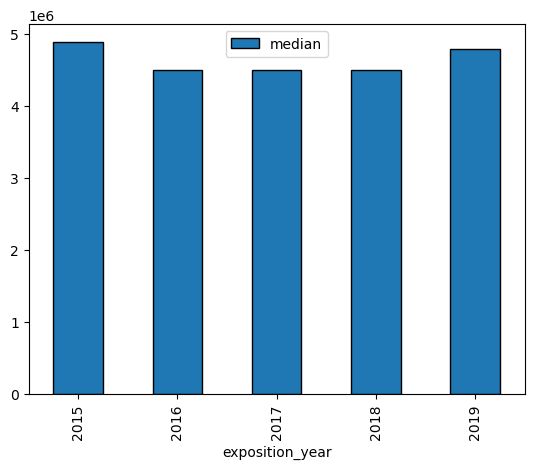

In [111]:
# Создаем сводную таблицу, график года от стоимости 
pivot_table_exposition_year_category = data_update.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_exposition_year_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_exposition_year_category.plot.bar(y = 'median', ec='black', legend=True)
#Выводим
pivot_table_exposition_year_category

Зависимость от года публикации не просматривается.

**Вывод**  
Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю.

Чтобы посмотреть связь между этажом и стоимостью квартиры построим сводную таблицу и визуализируем результаты на графике.

,mean,count,median
floor_category,,,
другой,6.156046e+06,13836,4650000
первый,4.555054e+06,2156,3850000
последний,5.994185e+06,2467,4250000


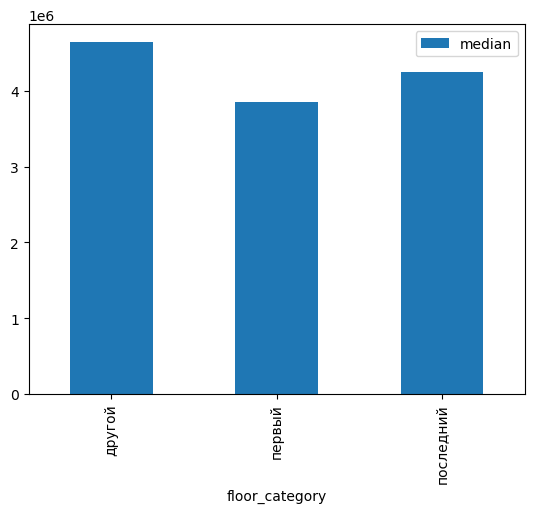

In [112]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot.bar(y = 'median', legend=True)
#Выводим
pivot_table_floor_category

Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир в группе "другой".

**Вывод**: 
  
На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом этаже стоимость квартиры меньше, чем на последнем, а в группе "другой" больше, чем на последнем этаже. Дата публикации объявления на стоимость не влияет.

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [113]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data_update['locality_name'].value_counts().head(10)
top_10_localities

locality_name
Санкт-Петербург      12360
посёлок Мурино         515
посёлок Шушары         386
Всеволожск             307
Колпино                293
посёлок Парголово      287
Пушкин                 275
деревня Кудрово        268
Гатчина                243
Выборг                 188
Name: count, dtype: int64

In [114]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_pivot = data_update.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,110889.165288
Пушкин,101872.379964
деревня Кудрово,92670.928731
посёлок Парголово,89192.878502
посёлок Мурино,85855.408272
посёлок Шушары,77796.707850
Колпино,74768.674642
Всеволожск,68689.275440
Гатчина,68300.437737


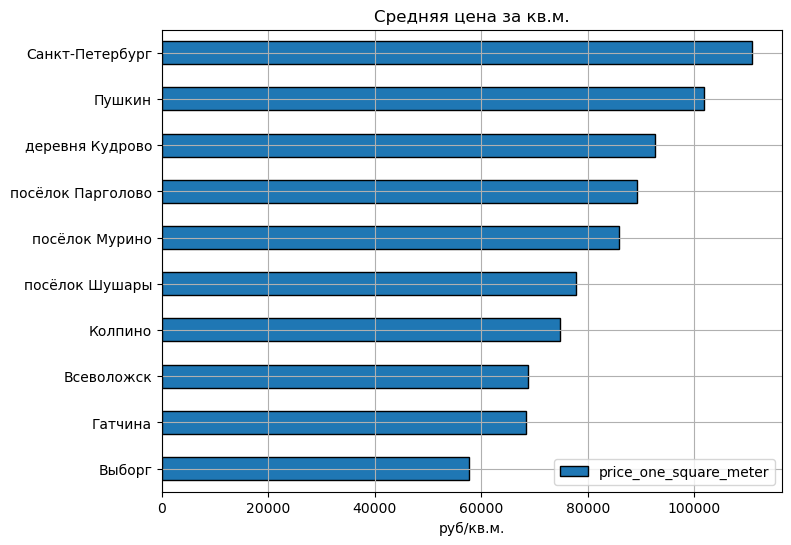

In [115]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за кв.м.')
plt.xlabel('руб/кв.м.')
plt.ylabel('')
plt.show()

Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге (110889 руб.), что логично. Следом по стоимости идет Пушкин (101872 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге (57594 руб.).

Ранее мы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [116]:
# выберем только Санкт-Петербург
df_spb = data_update.query('locality_name == "Санкт-Петербург"')

In [117]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0


In [118]:
# посмотрим длину получившегося df
len(df_spb)

12360

12360 Объявлений из Санкт-Петербурга. Определим среднюю стоимость квартир по мере удаления от центра города.

,mean,count,median
city_centers_nearest_km,,,
0.0,2.029200e+07,15,10990000
1.0,1.696601e+07,128,10950000
2.0,1.537392e+07,220,9450000
3.0,1.010780e+07,237,7900000
4.0,1.164745e+07,469,8548000
5.0,1.229177e+07,647,8800000
6.0,1.291894e+07,450,8163000
7.0,1.247400e+07,316,6994500
8.0,8.474633e+06,457,6700000


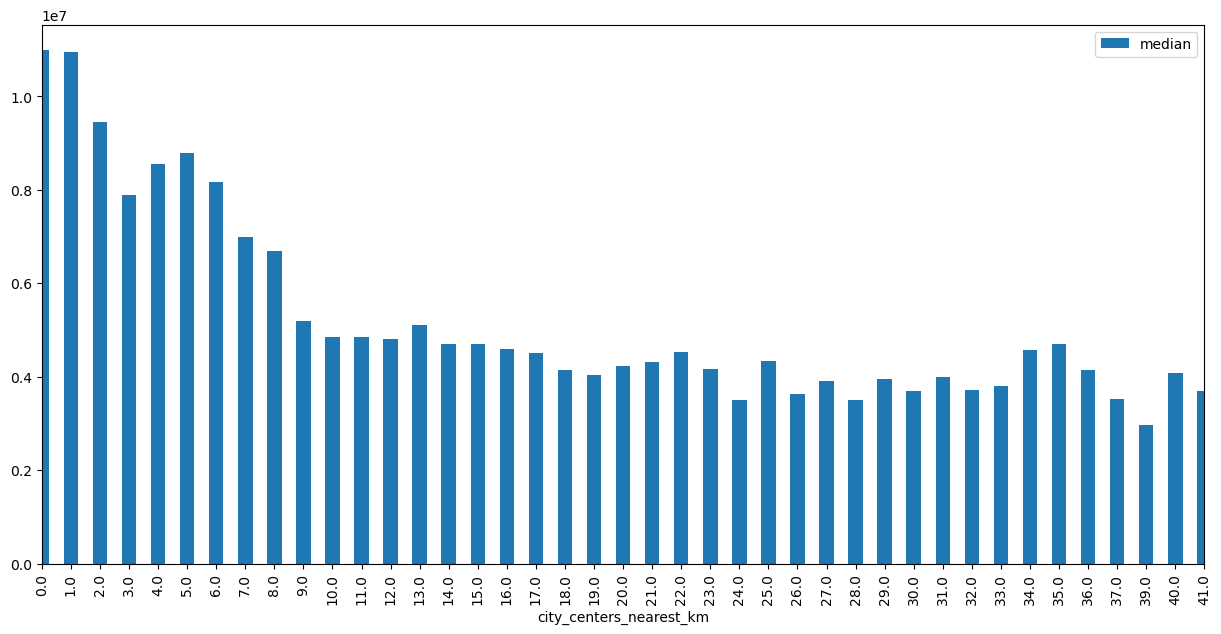

In [119]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot.bar(y = 'median', figsize= (15, 7), legend=True)
plt.xlim(0, 40)
#Выводим
pivot_table_floor_category

Из графика видно что самые высокие цены в центре города. Далее идёт спад который заканчивается на удалении в 9 км. от центра города. Далее мы видим пологое понижение цен с небольшими подъёмами, но не укоснительным снижением цен по мере удаления от центра города.

### Общий вывод

**Зависимость стоимости квартиры от её общей площади.**  
  
Определено что чем больше площадь квартиры тем выше её стоимость.(площадь - 159 кв.м. , цена - 64900000 руб. > площадь - 39.6 кв.м. , цена - 5050000 руб.)  

**Зависимость стоимости квартиры от жилой площади.**  
  
Определено что чем больше жилая площадь квартиры тем выше стоимость квартиры. (площадь - 32 кв.м., цена - 10000000 руб. > площадь - 20.3 кв.м., цена - 5050000 руб.)

**Зависимость стоимости квартиры от площади кухни**  
  
Определено что чем больше площадь кухни тем выше стоимость квартиры. (площадь - 41 кв.м., цена - 10000000 руб. > площадь - 8.3 кв.м., цена - 5196000 руб.)

**Зависимомть цен квартир от колличества комнат**  
  
Определено что чем больше комнат тем выше стоимость квартиры. (кол-во комнат - 3, цена - 64900000 руб. > кол-во комнат - 1, цена - 4650000 руб.)

**Зависимость стоимости квартиры от дня недели, месяца, года**  
  
Определено что на стоимость квартиры - дата подачи объявления не влияет.

**Зависимость стоимости квартиры от этажа**  
  
Определено что на первом и на последнем этажах стоимость квартир ниже чем на остальных.

**Зависимость цены от расстояния до центра города**  
  
Мы определили что чем ближе к центру города тем стоимость квартиры выше, соответственно чем дальше от центра города тем они ниже.

**Мы получили представление о типичном объекте недвижимости:**  
  
квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 кв.м., площадью кухни около 5,5 кв.м., с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 10-18 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.

**Также установлено:**

Ожидаемое время продажи объекта недвижимости - от 45 до 231 дней.  
Так же установленно что чаще всего объявления размещают в будние дни в январе и феврале.  
Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 110889 руб./кв.м. (топ-10 населенных пунктов по количеству объявлений).  
Самая низкая средняя стоимость квадратного метра в Выборге - 57594руб./кв.м. (топ-10 населенных пунктов по количеству объявлений).

**ВЫВОД**  
  
Практически все параметры так или иначе влияют на стоимость квартиры, кроме даты подачи объявления.  